In [1]:
import os
import math
import shutil
import numpy as np
from PIL import Image
from utils.draw import draw_xy
import matplotlib.pyplot as plt

In [2]:
def generate(count):
    X = np.random.randint(0, high=255, size=(count, 9))
    a = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0], 
                  [0, 0, 0, 1, 1, 1, 0, 0, 0], 
                  [0, 0, 0, 0, 0, 0, 1, 1, 1]])

    Y = np.eye(3)[np.argmax(X.dot(a.T), axis=1)]
    return X, Y

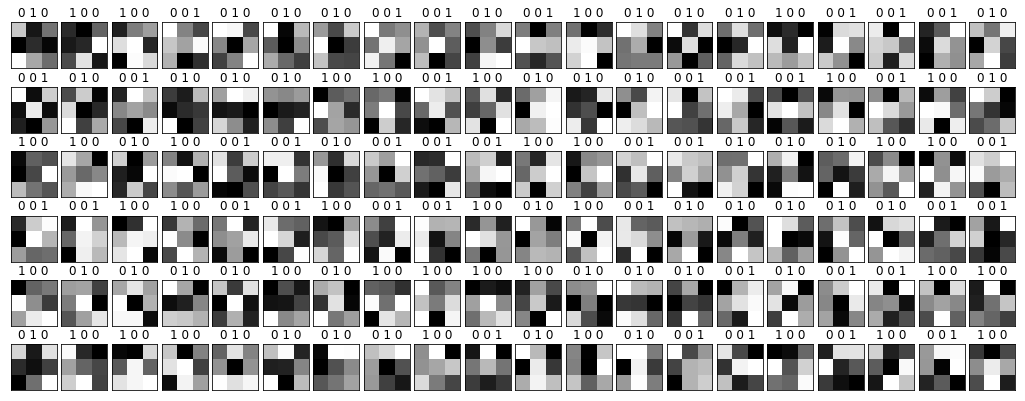

In [3]:
draw_xy(*generate(120))

In [4]:
def train(n=512, epochs=56000, lr = 1e-3):
    # weight vector
    W = np.random.randn(9, 3)
    b = np.random.randn(1, 3)

    # training loop
    for t in range(epochs):
        # get new training data
        X, y = generate(n)
        X = X / 255

        # model function
        h = X.dot(W) + b

        # compute loss
        loss = np.square(h - y).mean()

        # compute accuracy
        acc = (np.argmax(h, axis=1) == np.argmax(y, axis=1)).mean()

        if t % 5000 == 0:
            print('l: {:>8f}, a {:>.4f} (e {})'.format(loss, acc, t))

        # grad + update
        grad_w = 2 * X.T.dot(h - y) / n
        W -= lr * grad_w

        grad_b = 2 * np.sum(h - y, axis=0) / n
        b -= lr * grad_b

    return W, b

In [5]:
W, b = train()
print('\nFinal W = \n\n{}\n\nFinal b = \n\n{}'.format(W, b))

l: 7.244330, a 0.3086 (e 0)
l: 0.244001, a 0.5625 (e 5000)
l: 0.122819, a 0.8320 (e 10000)
l: 0.109741, a 0.9023 (e 15000)
l: 0.101504, a 0.9629 (e 20000)
l: 0.100167, a 0.9766 (e 25000)
l: 0.096685, a 0.9785 (e 30000)
l: 0.097124, a 0.9883 (e 35000)
l: 0.102150, a 0.9844 (e 40000)
l: 0.101715, a 0.9941 (e 45000)
l: 0.102728, a 0.9961 (e 50000)
l: 0.100048, a 0.9980 (e 55000)

Final W = 

[[ 0.57581461 -0.28201333 -0.28795022]
 [ 0.57698442 -0.28143682 -0.28947648]
 [ 0.57694965 -0.28128797 -0.28964128]
 [-0.27757231  0.57351376 -0.28982262]
 [-0.27804338  0.5734116  -0.2893808 ]
 [-0.27708325  0.57257135 -0.28923618]
 [-0.27831979 -0.27926513  0.56329508]
 [-0.27901205 -0.27857885  0.56369623]
 [-0.27803135 -0.27930115  0.56330972]]

Final b = 

[[0.30385543 0.31456846 0.35395995]]


In [8]:
npix = np.array([[255, 143, 255, 255, 187, 93, 5, 5, 5]])
a = npix.dot(W) + b
d = ['top', 'middle', 'bottom']
print(d[np.argmax(a)])

top
